# 1. Знайомство з даними
## Підготовка даних до аналізу та очищення даних

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
plt.style.use('seaborn-v0_8-colorblind')
FIG_WIDTH = 15
FIG_HEIGHT = 5
FIG_WIDTH_BAR = 12
FIG_HEIGHT_BAR = 8

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Project/Global_Cybersecurity_Threats_2015-2024.csv')

In [6]:
df.head(5)

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [7]:
df.shape

(3000, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [9]:
df.isnull().sum()

,0
Country,0
Year,0
Attack Type,0
Target Industry,0
Financial Loss (in Million $),0
Number of Affected Users,0
Attack Source,0
Security Vulnerability Type,0
Defense Mechanism Used,0
Incident Resolution Time (in Hours),0


In [10]:
df.duplicated().value_counts()

,count
False,3000


In [11]:
# checking memory usage
total_bytes = df.memory_usage().sum()
total_megabytes = round(total_bytes / (1024 * 1024), 2)
print(f'Memory used by dataset is {total_megabytes} MB')

Memory used by dataset is 0.23 MB


In [12]:
# convert text columns with object type to categories type
for col in df.select_dtypes(include=['object']).columns:
  df[col] = df[col].astype('category')

# checking memory usage after changing the type
total_bytes = df.memory_usage().sum()
total_megabytes = round(total_bytes / (1024 * 1024), 2)
print(f'Memory used by dataset is {total_megabytes} MB')

Memory used by dataset is 0.11 MB


In [13]:
df.columns

Index(['Country', 'Year', 'Attack Type', 'Target Industry',
       'Financial Loss (in Million $)', 'Number of Affected Users',
       'Attack Source', 'Security Vulnerability Type',
       'Defense Mechanism Used', 'Incident Resolution Time (in Hours)'],
      dtype='object')

In [14]:
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]
df.columns

Index(['country', 'year', 'attack_type', 'target_industry',
       'financial_loss_(in_million_$)', 'number_of_affected_users',
       'attack_source', 'security_vulnerability_type',
       'defense_mechanism_used', 'incident_resolution_time_(in_hours)'],
      dtype='object')

In [15]:
df.year = pd.to_datetime(df.year, format='%Y').dt.year

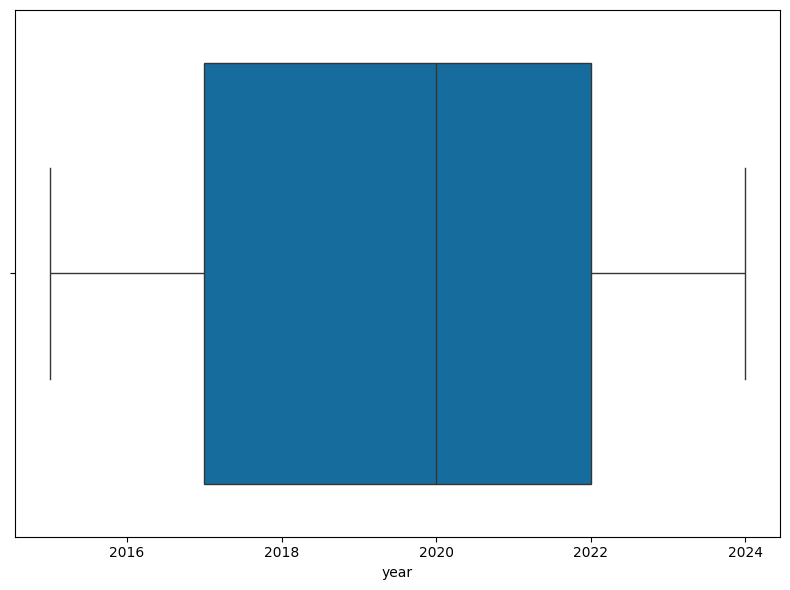

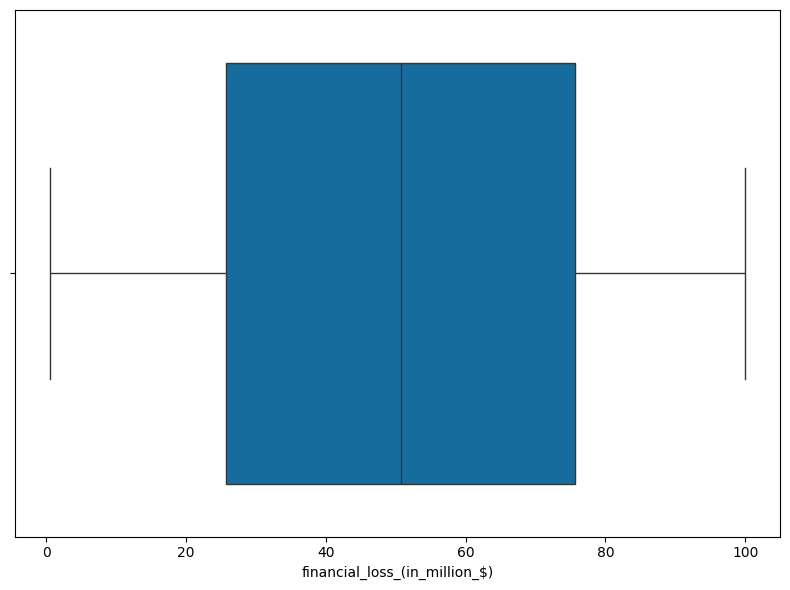

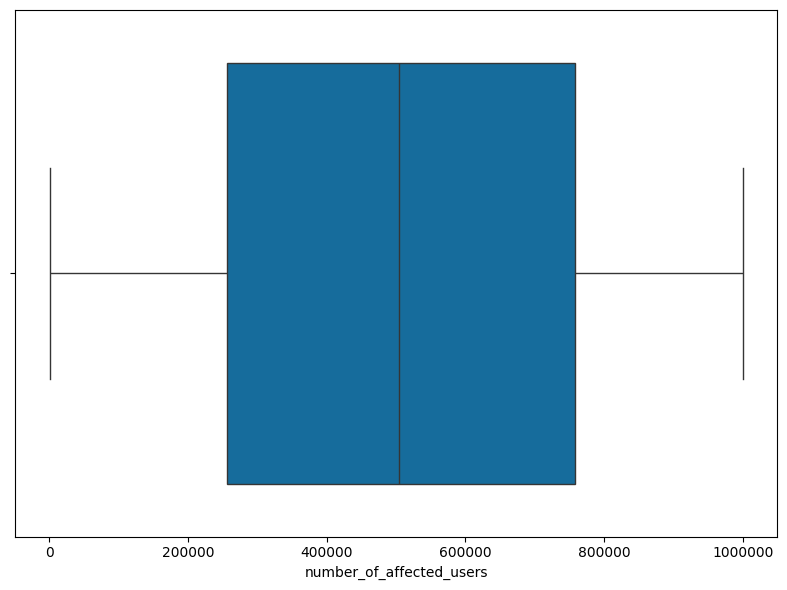

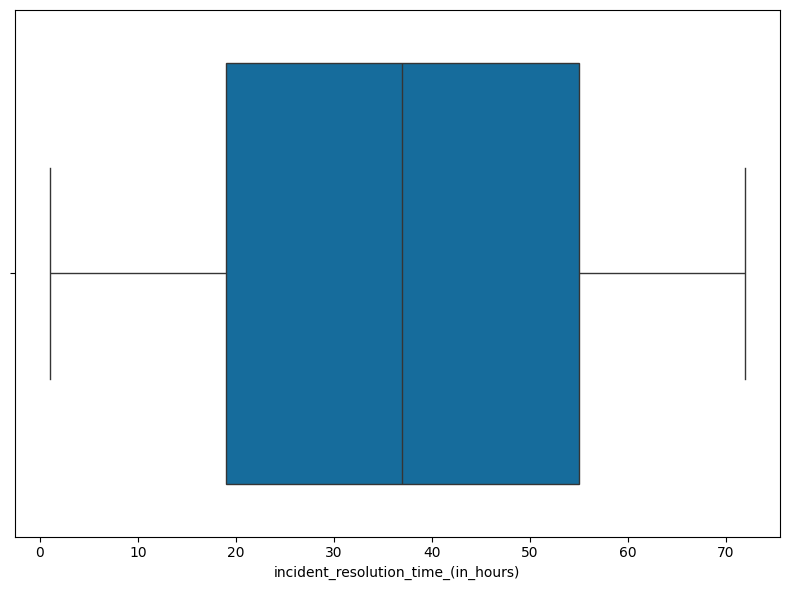

In [16]:
numeric_cols = ['year', 'financial_loss_(in_million_$)', 'number_of_affected_users', 'incident_resolution_time_(in_hours)']

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data = df, x = col)
    plt.ticklabel_format(style='plain', axis='x')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

Результати 1 етапу:


*   датасет складається з 3000 рядків та 10 колонок
*   тип даних в колонках відповідає фактичним значенням
*   в датасеті немає пропущених даних та дублікатів
*   переведено колонки типу object в категоріальний тип (category) для оптимізації пам'яті. В результаті цього було зменшено датасет з 0.23 MB до 0.11 MB
*   переведено колонку year з int в тип datetime для майбутніх обчислень
*   в результаті аналізу було виявлено, що підписи конок містять пробіли. Для спрощення подальшої роботи пробіли було замінено на нижнє підкреслення
* також було перевірено за допомогою box & whisker plot чи є в даних викиди серед числових колонок даних, в результаті аналізу таких даних не було виявлено.


# 2. Формування запитань до даних
На даному етапі буде сформовано 10 запитань до даних, відповіді на які допоможуть трасформувати та оптимізувати наявні процеси та допомогти країнам побачити певні закономірності, що в майбутньму надасть можливість запобігти майбутнім загрозам кібербезпеки.

###2.1 Як змінилася кількість глобальних загроз кібербезпеки з 2015 по 2024 рік? Чи є помітні тенденції до зростання чи спадання?

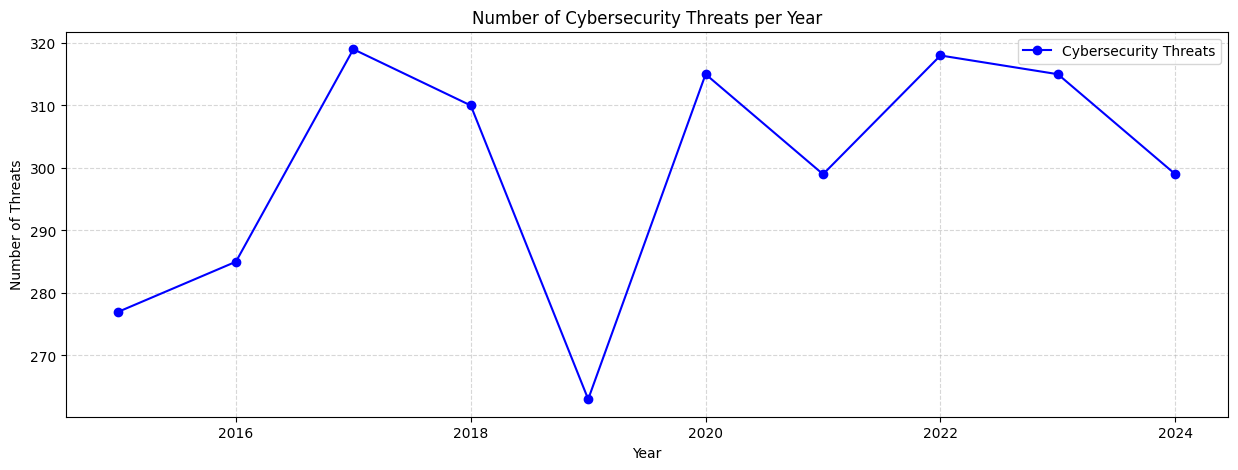

In [17]:
data_groupedby_year = df.groupby("year")["attack_type"].count()

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(data_groupedby_year.index, data_groupedby_year.values, marker='o', linestyle='-', color='blue', label='Cybersecurity Threats')
plt.title('Number of Cybersecurity Threats per Year')
plt.xlabel('Year')
plt.ylabel('Number of Threats')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

На графіку можна чітко побачити чіткий спад кількості кіберзагроз в 2019 році та зростання в 2017, 2020 та 2022 році.
Спад кількості кіберзагроз у 2019 році може бути спричинений декількома факторами:

* Гіпотеза 1: У цей період багато організацій почали активніше впроваджувати сучасні засоби захисту (зокрема, багатофакторну автентифікацію та моніторинг аномалій), що ускладнило здійснення атак.
* Гіпотеза 2: Зменшення активності окремих хакерських угруповань через жорсткіші арешти та штрафи
* Гіпотеза 3: Частина кібезлочинців, могла використовувати нові менш помітні методи атак, які не були виявлені, що призвело до зниження загальної кількості інцидентів.

Спад 2019 року може бути результатом комбінації цих факторів, але важливо також враховувати, що статистика може відображати не реальне зменшення загроз, а зміни в методах їх виявлення та реєстрації.










###2.2 Як змінилася сума фінансових втрат з 2015 по 2024 рік? Чи є помітні тенденції до зростання чи спадання?

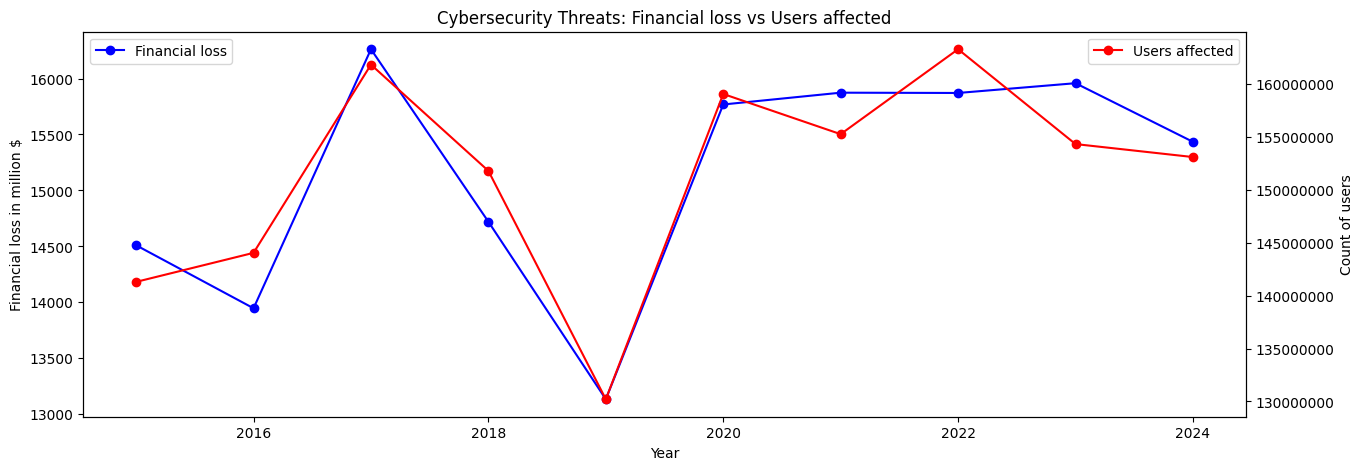

In [18]:
data_groupedby_year_finloss = df.groupby("year")["financial_loss_(in_million_$)"].sum()
data_groupedby_year_users = df.groupby("year")["number_of_affected_users"].sum()

fig, ax1 = plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))

# Primary x-axis plot
ax1.plot(data_groupedby_year_finloss.index, data_groupedby_year_finloss.values, marker='o', color='blue', label='Financial loss')
ax1.set_xlabel('Year')
ax1.set_ylabel('Financial loss in million $')
ax1.set_title('Cybersecurity Threats: Financial loss vs Users affected')

# Secondary x-axis plot
ax2 = ax1.twinx()
ax2.plot(data_groupedby_year_users.index, data_groupedby_year_users.values, marker='o', color='red', label='Users affected')
ax2.set_ylabel('Count of users')
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(False)

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Лінійний графік показує, що cумарна кількість користувачів, які постраждали від глобальних кібератак, та сумарні фінансові втрати у 2017, 2019, 2020 та 2024 роках є приблизно однаковими, на відміну від інших років. Це свідчить про те, що більша кількість постраждалих користувачів не завжди призводить до значніших фінансових втрат. Важливими чинниками є сфера, на яку спрямовано атаку, та методи, які при цьому використовувалися. Наприклад, на графіку видно, що у 2021 та 2023 роках фінансові втрати перевищують кількість постраждалих користувачів.

###2.3 Чи наявна залежніть між кількістю постраждалих користувачів та фінансовими втратами?

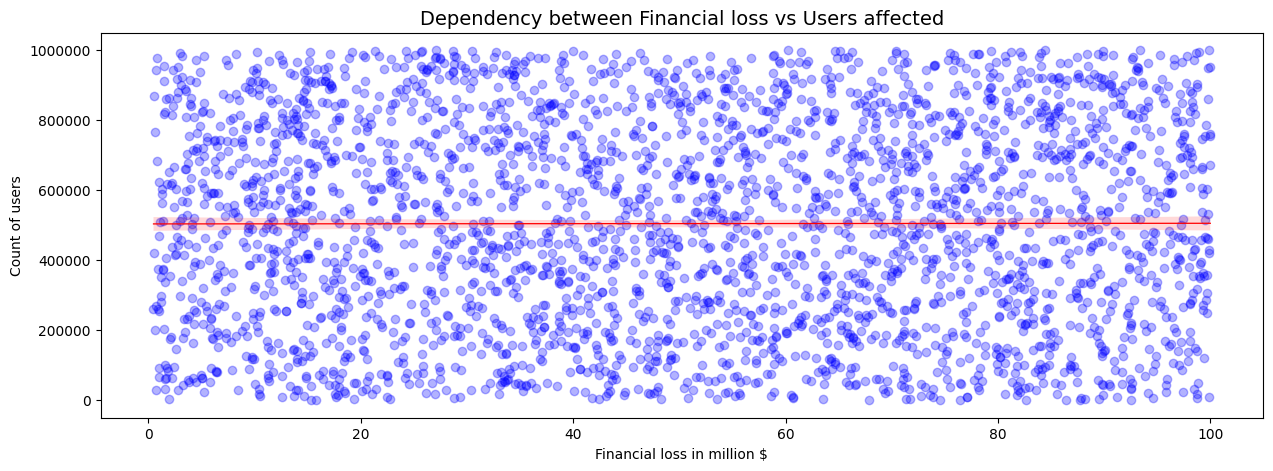

In [19]:
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
x=df['financial_loss_(in_million_$)']
y=df['number_of_affected_users']
sns.regplot(x=x, y=y, scatter_kws=dict(color='b', alpha=.3),
            line_kws=dict(color="r",
            linewidth=0.9))
plt.xlabel('Financial loss in million $')
plt.ylabel('Count of users')
plt.title('Dependency between Financial loss vs Users affected',
         fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Точки розташовані досить хаотично по всьому графіку, що свідчить про відсутність сильної кореляції. Немає очевидної залежності між фінансовими втратами та кількістю постраждалих користувачів. Це може означати, що великі фінансові втрати не завжди корелюють з великою кількістю постраждалих.

###2.4 У яких країнах спостерігається найбільше зростання загроз з 2015 по 2024?

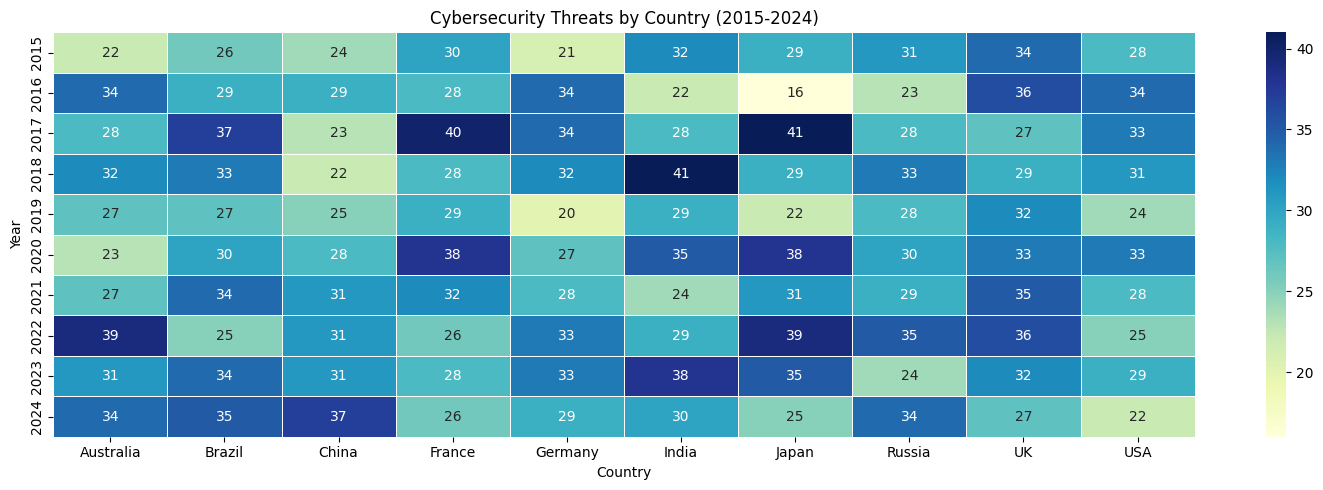

In [20]:
data_groupedby_year_country = df.groupby(["year", "country"])["attack_type"].count().unstack(fill_value=0)
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
sns.heatmap(data_groupedby_year_country,
            annot=True, cmap="YlGnBu",
            linewidths=0.5)
plt.title("Cybersecurity Threats by Country (2015-2024)")
plt.xlabel("Country")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

In [21]:
country_growth = data_groupedby_year_country.pct_change() * 100
cumulative_growth = country_growth.sum().sort_values(ascending=False)
print(cumulative_growth)

country
Japan        99.301023
Australia    71.744643
Germany      62.962043
China        51.501340
Brazil       47.047072
Russia       33.375581
India        33.259274
France        6.806364
USA          -6.657588
UK          -16.058774
dtype: float64


На тепловій діаграмі видно, що найменшу кількість загроз було зафіксовано в Японії у 2016 році та в Німеччині у 2019 році. Натомість найбільшу кількість загроз виявлено в Японії у 2017 році, в Індії у 2018 році та у Франції у 2017 році. За допомогою формули обраховуємо відсоток змін між роками та додаємо всі значення за всі роки і отримуємо найбільше загальне зростання. В результаті обчислень найбільше зростання кіберзагроз виявлено в Японії на 99% та найменше у Великій Британії -16%.
* Гіпотеза 1. У Великій Британії використовують кращі системи захисту, ніж в Японії
* Гіпотеза 2. Для кіберзлочинців економічно вигідно скоювати злочини в Японії
* Гіпотеза 3. В Японії гірші системи виявлення кіберзагроз, ніж у Великій Британії.

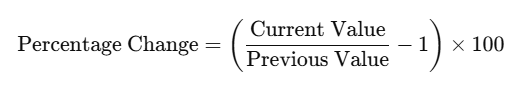

###2.5 Які найпоширеніші типи кіберзагроз?

In [22]:
pivot_table_year_attack = df.pivot_table(index="year", columns="attack_type", aggfunc="size", fill_value=0)
#pivot_table_year_attack.loc['Totals'] = pivot_table_year_attack.sum(axis=0)
pivot_table_year_attack

attack_type,DDoS,Malware,Man-in-the-Middle,Phishing,Ransomware,SQL Injection
year,,,,,,
2015,50,51,41,46,47,42
2016,53,41,47,55,42,47
2017,58,46,58,64,44,49
2018,60,56,36,52,49,57
2019,48,43,44,45,38,45
2020,56,37,47,61,59,55
2021,47,49,48,41,55,59
2022,54,64,41,57,56,46
2023,51,55,50,46,50,63


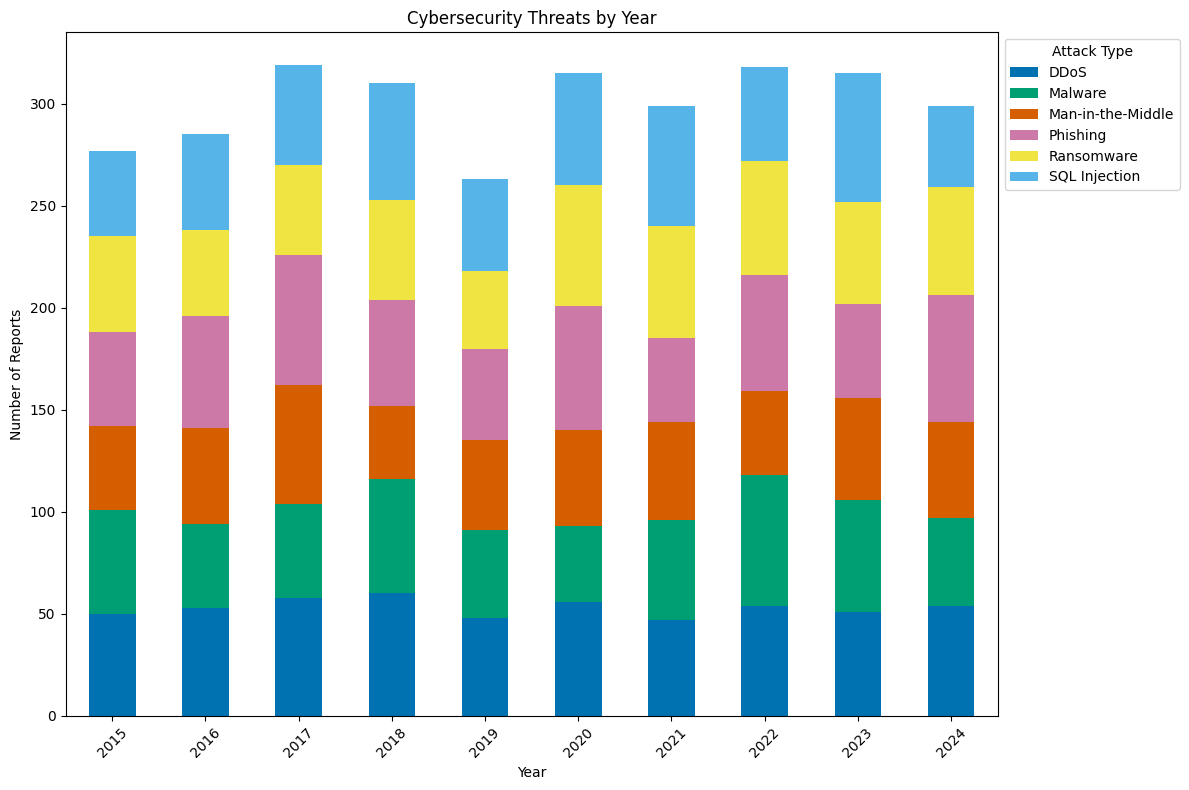

In [23]:
pivot_table_year_attack.plot(kind='bar', stacked=True, figsize=(FIG_WIDTH_BAR, FIG_HEIGHT_BAR))

# Adding labels and title
plt.title("Cybersecurity Threats by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45)
plt.legend(title="Attack Type", bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

Якщо розглядати найпоширеніший тип кіберзагроз у розрізі кожного року отримаємо такий список згідно стовпчастої діаграми:
* 2015 - Malware
* 2016 - Phishing
* 2017 - Phishing
* 2018 - DDoS
* 2019 - DDoS
* 2020 - Phishing
* 2021 - SQL Injection
* 2022 - Malware
* 2023 - SQL Injection
* 2024 - Phishing

Cумарно з 2016-2024 роки найбільше було здійснено DDoS та Phishing атак. Можна припустити, що дані типи атак найбільш розповсюджені, тому найчастіше застосовуються кіберзлочинцями.

###2.6 Яка сфера найбільше страждає через кібератак?

In [24]:
pivot_table_target_industry = df.pivot_table(index="target_industry", columns="attack_type", aggfunc="size", fill_value=0)
#pivot_table_target_industry['Total'] = pivot_table_target_industry.sum(axis=1)
pivot_table_target_industry

attack_type,DDoS,Malware,Man-in-the-Middle,Phishing,Ransomware,SQL Injection
target_industry,,,,,,
Banking,71,61,77,96,69,71
Education,73,70,65,73,71,67
Government,71,64,53,68,72,75
Healthcare,78,81,58,63,77,72
IT,91,67,80,89,74,77
Retail,62,68,70,89,71,63
Telecommunications,85,74,56,51,59,78


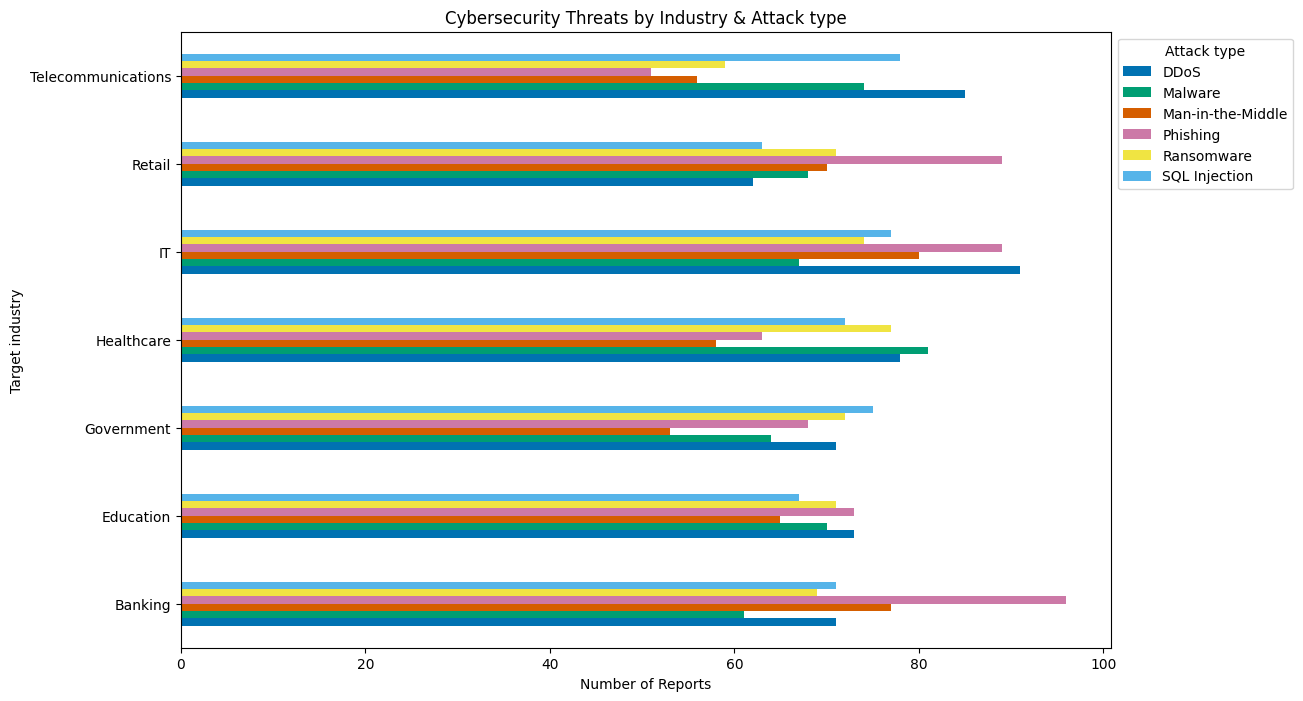

In [25]:
def bar_plot(pivot_table, title, xlabel, ylabel, legend_title):
  pivot_table.plot(kind="barh", figsize=(FIG_WIDTH_BAR, FIG_HEIGHT_BAR))
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.legend(title=legend_title, bbox_to_anchor=(1, 1), loc='upper left')
  return plt.show()

bar_plot(pivot_table_target_industry, "Cybersecurity Threats by Industry & Attack type", "Number of Reports", "Target industry", "Attack type")

На стовпчиковій діаграмі в період з 2016 по 2024 рік помітно такі тенденції:
* Телекомунікації (Telecommunications):

Найчастіше зустрічаються DDoS атаки, що вказує на націленість зловмисників на переривання сервісів.

Також значна кількість випадків SQL Injection, що свідчить про вразливість баз даних.
* Роздрібна торгівля (Retail):

Лідирують Фішингові атаки (Phishing), що свідчить про націленість на клієнтські дані.
Значна кількість DDoS атак, що може свідчити про спроби порушення онлайн-послуг.

* ІТ:

Найбільш розповсюджені DDoS атаки, що може бути пов’язано з високою доступністю онлайн-сервісів.

Також часто зустрічається Phishing, що може вказувати на людський фактор як слабку ланку.

* Охорона здоров’я (Healthcare):

Основна загроза — Malware (шкідливе ПЗ), що вказує на спроби зараження систем з метою крадіжки даних або блокування доступу.
Також присутні Фішинг-атаки, що може свідчити про вразливість персоналу до соціальної інженерії.

* Державний сектор (Government):

Найчастіше здійснюються SQL Injection атаки, що вказує на недостатній захист баз даних.
Також значні випадки DDoS атак, що може бути пов’язано з політичними мотиваціями або протестами.

* Освіта (Education):

Фішинг (Phishing) та DDoS атаки зустрічаються майже однаково часто, що може свідчити про недостатній рівень кіберграмотності та захисту.
Присутні випадки Ransomware, що вказує на спроби блокування освітніх сервісів.

* Банківська сфера (Banking):

Лідирує Фішинг (Phishing), що свідчить про цілеспрямованість атак на клієнтські дані.
Також значна кількість Man-in-the-Middle атак, що вказує на перехоплення фінансових транзакцій.


Для кожної сфери необхідно приділити особливу увагу вразливостям систем з метою зменшення кількості подібних інцидентів у майбутньому. Зосередження на покращенні захисту від найпоширеніших атак дозволить ефективніше мінімізувати ризики. Розглянемо, які є типи вразливостей більш детально на наступному графіку.

###2.7 Від яких типів вразливості системи страждає кожна сфера?

In [26]:
pivot_table_vulnerability = df.pivot_table(index="target_industry", columns="security_vulnerability_type", aggfunc="size", fill_value=0)
pivot_table_vulnerability

security_vulnerability_type,Social Engineering,Unpatched Software,Weak Passwords,Zero-day
target_industry,,,,
Banking,117,107,111,110
Education,115,101,94,109
Government,96,97,98,112
Healthcare,112,105,115,97
IT,107,112,122,137
Retail,97,109,102,115
Telecommunications,103,107,88,105


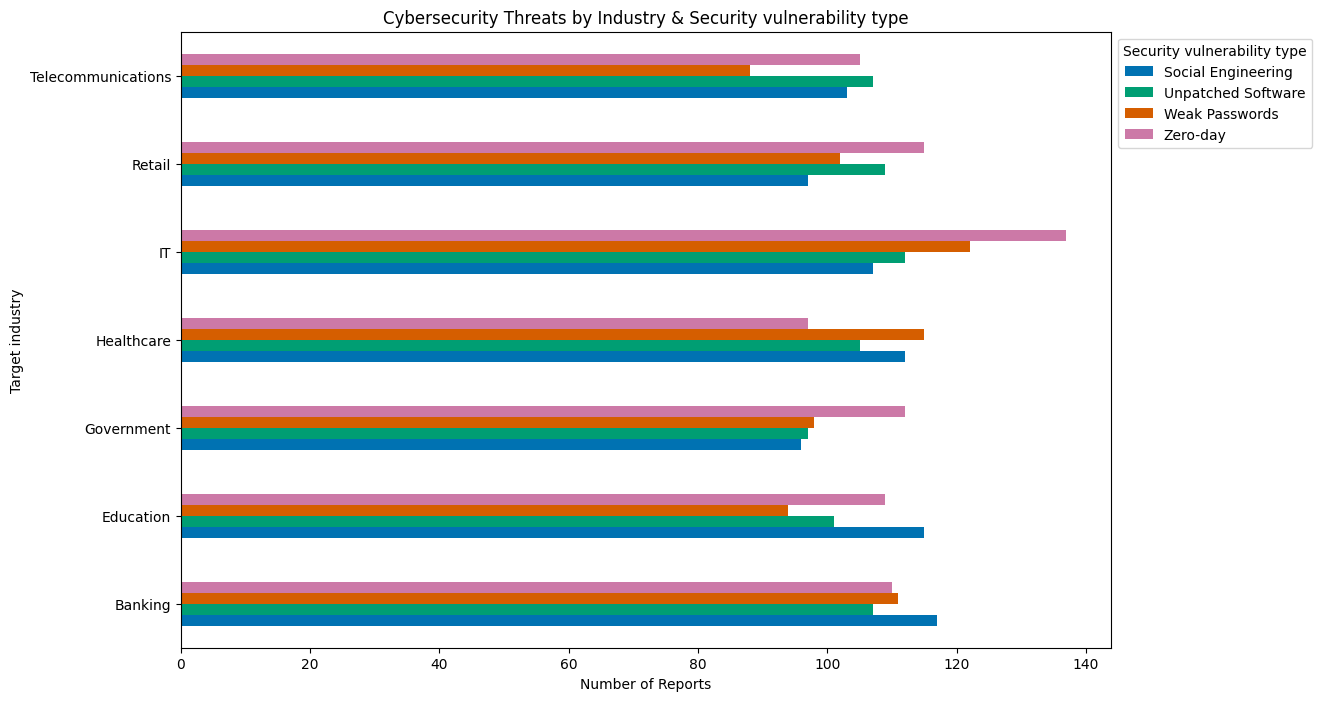

In [27]:
bar_plot(pivot_table_vulnerability, "Cybersecurity Threats by Industry & Security vulnerability type", "Number of Reports", "Target industry", "Security vulnerability type")

На стовпчиковій діаграмі в період з 2016 по 2024 рік помітно такі тенденції:
* Телекомунікації (Telecommunications):

Найпоширеніший тип вразливості — Zero-day, що вказує на високу схильність до нових та непатчених загроз.

Також значною проблемою є cлабкі паролі.

* Роздрібна торгівля (Retail):

Лідирує cоціальна інженерія, що підкреслює вразливості людського фактора.
Непатчене програмне забезпечення також часто зустрічається, що вказує на необхідність кращого оновлення.

* ІТ:

Домінують вразливості типу Zero-day, що відображає високий ризик нових загроз.
Слабкі паролі також часто зустрічаються, що свідчить про проблеми з управлінням обліковими даними.

* Охорона здоров’я (Healthcare):

Основна проблема — cлабкі паролі, що вказує на відсутність надійних політик паролів.
Також значна загроза — cоціальна інженерія.

* Державний сектор (Government):

Найпоширеніша проблема — Zero-day, що свідчить про складнощі з усуненням нововиявлених вразливостей.
Також значний ризик становить Соціальна інженерія, що підкреслює людський фактор у зламах.

* Освіта (Education):

Соціальна інженерія та Zero-day вразливості майже на одному рівні.
Непатчене програмне забезпечення також становить значний ризик, що вказує на застарілі системи.

* Банківська сфера (Banking):

Найбільша вразливість — cлабкі паролі, що вказує на недостатню безпеку облікових даних.
Також значна загроза — cоціальна інженерія, що свідчить про схильність до фішингу та маніпуляцій.



## Висновки на основі аналізу двох графіків (вразливості та типи атак)

Аналіз двох графіків дозволяє зробити кілька важливих висновків щодо кібербезпеки у різних галузях:

1. Підвищення обізнаності працівників:

Основною проблемою залишається людський фактор: фішинг та слабкі паролі є найбільш розповсюдженими загрозами у таких галузях, як Retail, Banking та Education. Це свідчить про необхідність регулярного навчання працівників основам кібербезпеки та впровадження багатофакторної автентифікації (MFA).

2. Захист від DDoS атак:

Галузі Телекомунікації та ІТ найчастіше зазнають DDoS атак, що свідчить про потребу у впровадженні сучасних засобів захисту мережі та моніторингу аномалій у трафіку. Рекомендовано використовувати системи поглинання трафіку та мережеві екрани (WAF).

3. Регулярне оновлення програмного забезпечення:

Часто уразливості з’являються через непатчене ПЗ, що особливо характерно для секторів Освіти та Державного управління. Регулярні оновлення та централізоване керування патчами допоможуть знизити ризик атак.

4. Захист баз даних від SQL Injection:

Галузі Державного сектору та Телекомунікації є особливо вразливими до атак типу SQL Injection. Необхідно використовувати захищені методи обробки запитів (наприклад, підготовлені запити) та регулярно перевіряти безпеку веб-додатків.

5. Антивірусний захист:

Найбільшу загрозу від шкідливого ПЗ (Malware) зазнає сектор Healthcare, що свідчить про потребу у багаторівневому антивірусному захисті, використанні систем виявлення аномалій та резервному копіюванні даних для мінімізації збитків від Ransomware атак.

6. Моніторинг та виявлення загроз:

Галузі з високим ризиком Zero-day атак (зокрема, ІТ та Телекомунікації) повинні впроваджувати системи моніторингу у реальному часі. Застосування моніторингових систем допоможе швидко реагувати на нові види загроз.

7. Комплексний підхід до кібербезпеки:

Всі галузі мають розробити та впровадити стратегії кіберзахисту, що включають навчання, оновлення систем, моніторинг та реагування на інциденти.



###2.8 Скільки часу необхідно для усунення проблеми в залежності від типу атаки?

In [28]:
data_groupedby_incident_resolution = (
    df.groupby(["attack_type", "attack_source"])["incident_resolution_time_(in_hours)"]
    .sum()
    .reset_index()
    .sort_values(by="incident_resolution_time_(in_hours)", ascending=False)
)

data_groupedby_incident_resolution.head(5)

,attack_type,attack_source,incident_resolution_time_(in_hours)
1,DDoS,Insider,5431
23,SQL Injection,Unknown,5291
14,Phishing,Nation-state,5220
22,SQL Injection,Nation-state,5123
2,DDoS,Nation-state,4776


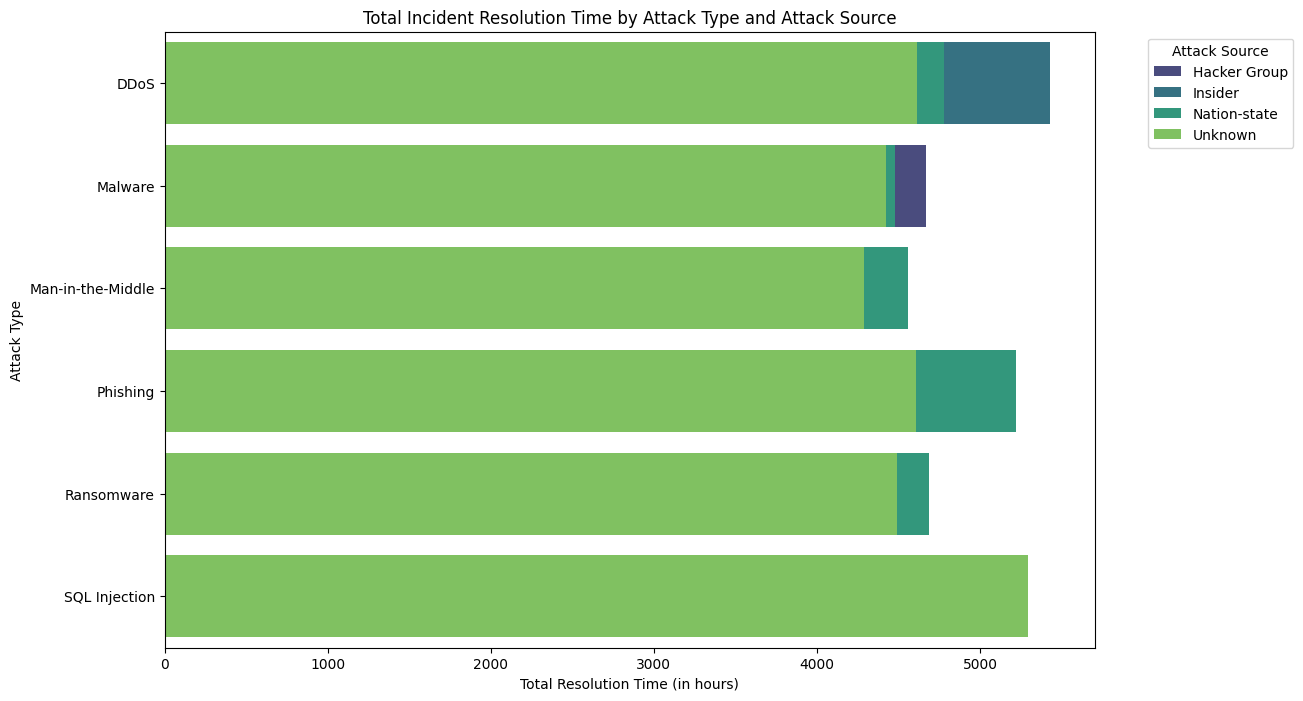

In [29]:
plt.figure(figsize=(FIG_WIDTH_BAR, FIG_HEIGHT_BAR))
sns.barplot(
    data=data_groupedby_incident_resolution,
    x="incident_resolution_time_(in_hours)",
    y="attack_type",
    hue="attack_source",
    dodge=False,
    palette="viridis"
)
plt.title("Total Incident Resolution Time by Attack Type and Attack Source")
plt.xlabel("Total Resolution Time (in hours)")
plt.ylabel("Attack Type")
plt.legend(title="Attack Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Найбільшу частину часу на вирішення інцидентів у більшості випадків займають атаки з невідомим джерелом (Unknown).

Фішингові та програмні атаки (Ransomware) значною мірою спричинені національними державами (Nation-state) та внутрішніми загрозами (Insider).

Malware частково пов’язаний з діяльністю хакерських груп (Hacker Group).

Щодо SQL Injection, практично весь час вирішення інцидентів припадає на атаки з невідомим джерелом.

##Висновок:
Графік демонструє, що найбільшу частину часу на ліквідацію інцидентів витрачають на атаки з невідомим джерелом.

На фішингові та програмні атаки (Ransomware) значний вплив мають національні держави та внутрішні загрози.

Для покращення кібербезпеки слід спрямувати зусилля на ідентифікацію джерел атак та зниження ризиків, пов’язаних з невідомими загрозами.

###2.9 Чи можна стверджувати, що після 2020 року середній рівень фінансових втрат залишався стабільним порівняно з попередніми роками?

Гіпотеза:

Нульова гіпотеза (H0): Середні фінансові втрати до 2020 року не відрізняються від середніх втрат після 2020 року.

Альтернативна гіпотеза (H1): Середні фінансові втрати після 2020 року суттєво вищі за втрати до 2020 року.

In [30]:
alpha = 0.05

before_2020 = df[df['year'] < 2020]["financial_loss_(in_million_$)"]
after_2020 = df[df['year'] >= 2020]["financial_loss_(in_million_$)"]

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(after_2020, before_2020, equal_var=False)

if(p_value <  alpha):
    print("Відхилити Н0.")
else:
    print("Н0 не може бути відхилена.")

Н0 не може бути відхилена.


##Висновок

Хоча середні втрати після 2020 року здаються вищими, різниця не є статистично значущою на рівні α = 0.05.

Можна сказати, що після 2020 року фінансові втрати залишалися відносно стабільними з точки зору статистики.

##2.10 ТОП 5 країн, які зазнали найбільше фінансових втрат?

In [31]:
top_countries = df.groupby("country")["financial_loss_(in_million_$)"].sum().sort_values(ascending=False).head(5)
top_countries


,financial_loss_(in_million_$)
country,
UK,16502.99
Germany,15793.24
Brazil,15782.62
Australia,15403.00
Japan,15197.34


# Загальні висновки

**Фінансові втрати**: Найбільші фінансові втрати країни зазнали у 2017 році, а найменші — у 2019 році. Серед усіх країн найбільше втратила Велика Британія — понад 16 мільярдів доларів.

**Кіберзагрози**: У 2017 році було виявлено найбільшу кількість загроз кібербезпеки, причому найпоширенішим видом атаки був фішинг (Phishing). Після 2020 року ситуація з кіберзагрозами залишилася відносно стабільною з точки зору статистики.

**Найбільш постраждалі сфери**: Найбільших збитків зазнали сфери ІТ та банківська сфера. У сфері ІТ переважають DDoS-атаки, а у банківській сфері — фішинг. Більшість зареєстрованих кібератак здійснюються з невідомого джерела та потребують найбільше часу для вирішення.